<a href="https://colab.research.google.com/github/antoinebachand/Data-Analysis/blob/main/Hydrogen_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the Data
df = pd.read_excel('Spilway.xlsx', header=0, index_col=False, keep_default_na=True)
power = pd.read_excel('power.xlsx', header=0, index_col=False, keep_default_na=True)

In [4]:
df.head()

,Time stamp,Value [m³/s]
0,30.08.2002 09:00:00,1.24
1,30.08.2002 10:00:00,1.24
2,30.08.2002 11:00:00,1.24
3,30.08.2002 12:00:00,1.24
4,30.08.2002 13:00:00,1.24


In [5]:
power.head()

,Time stamp,Value [MW],Value [m³/s],Ratio
0,31.08.2002 00:00:00,98.25,---,NaN
1,01.09.2002 00:00:00,105.8,172.55,0.613156
2,02.09.2002 00:00:00,111.23,185.55,0.599461
3,03.09.2002 00:00:00,109.88,178.83,0.614438
4,04.09.2002 00:00:00,106.27,179.25,0.592859


In [19]:
power['Ratio'].mean()

0.6207683281146462

In [7]:
# Now lets estimate the spilway capacity
df['Capacity[MW]']= df['Value [m³/s]'].astype(float) * (power['Ratio'].mean())
df.head()

,Time stamp,Value [m³/s],Capacity[MW]
0,30.08.2002 09:00:00,1.24,0.769753
1,30.08.2002 10:00:00,1.24,0.769753
2,30.08.2002 11:00:00,1.24,0.769753
3,30.08.2002 12:00:00,1.24,0.769753
4,30.08.2002 13:00:00,1.24,0.769753


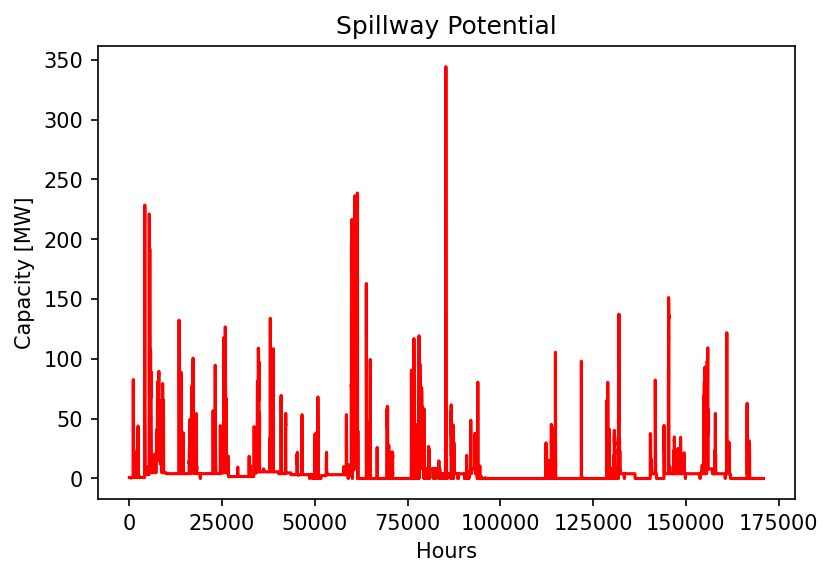

In [34]:
fig,ax = plt.subplots(dpi=150)
ax.plot(df['Capacity[MW]'], 'r')
ax.set_xlabel('Hours')
ax.set_ylabel('Capacity [MW]')
ax.set_title('Spillway Potential')
plt.show() 

In [28]:
# Now lets estimate the production of Hydrogen 
#We assume the use of the Silyzer 300 from Siemens. 
#Thus, the production is 19.4 kg/h for a capacity of 1 MW. 

df['Hydrogen Mass (kg)']= df['Capacity[MW]']*(19.4)
print('The mean production is '+ str(df['Hydrogen Mass (kg)'].mean()) + ' kg')
print('The max production rate is: '+ str(max(df['Hydrogen Mass (kg)'])) + ' kg')

df.head()





The mean production is 143.00898435895783 kg
The max production rate is: 6677.550277916375 kg


,Time stamp,Value [m³/s],Capacity[MW],Hydrogen Mass (kg)
0,30.08.2002 09:00:00,1.24,0.769753,14.933203
1,30.08.2002 10:00:00,1.24,0.769753,14.933203
2,30.08.2002 11:00:00,1.24,0.769753,14.933203
3,30.08.2002 12:00:00,1.24,0.769753,14.933203
4,30.08.2002 13:00:00,1.24,0.769753,14.933203


In [29]:
# Now lets see the 10 largest production size idea 
df.nlargest(10, ['Hydrogen Mass (kg)'])

,Time stamp,Value [m³/s],Capacity[MW],Hydrogen Mass (kg)
85320,24.05.2012 10:00:00,554.48,344.203623,6677.550278
61488,04.09.2009 10:00:00,384.34,238.586099,4628.570325
61489,04.09.2009 11:00:00,383.36,237.977746,4616.768278
61490,04.09.2009 12:00:00,382.01,237.139709,4600.510355
61491,04.09.2009 13:00:00,380.79,236.382372,4585.818010
60802,06.08.2009 20:00:00,380.69,236.320295,4584.613720
61277,26.08.2009 15:00:00,376.26,233.570291,4531.263648
61279,26.08.2009 17:00:00,376.17,233.514422,4530.179787
61278,26.08.2009 16:00:00,375.97,233.390268,4527.771205
60803,06.08.2009 21:00:00,375.66,233.197830,4524.037905


# So we can see that the 6677 kg/h is an irregularity and the real max is always under 5000

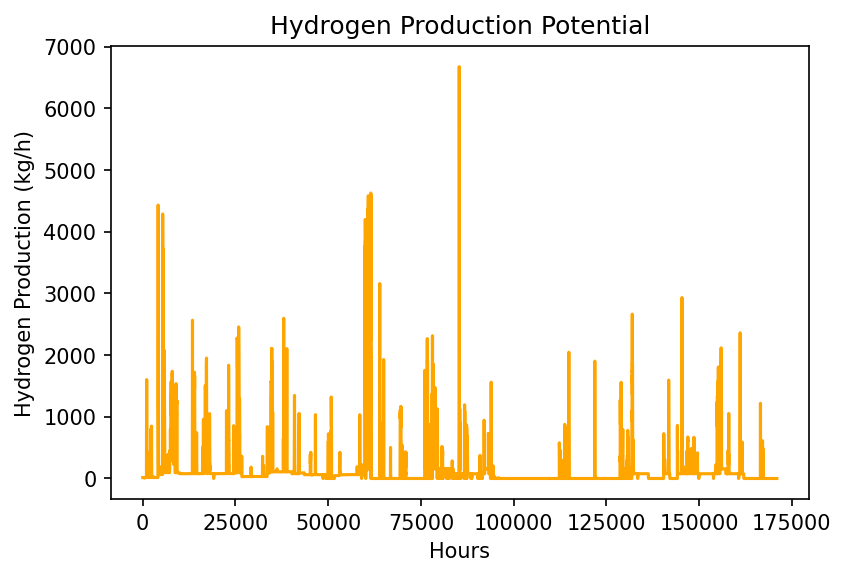

In [33]:
# Now lets plot the hydrogen Mass Production 
fig,ax = plt.subplots(dpi=150)
ax.plot(df['Hydrogen Mass (kg)'], 'Orange')
ax.set_xlabel('Hours')
ax.set_ylabel('Hydrogen Production (kg/h)')
ax.set_title('Hydrogen Production Potential')
plt.show() 